In [1]:
using CSV, DataFrames, Plots
#include("../Chakra/src/Chakra.jl")
include("../Melch/src/Melch.jl")
include("src/Idyoms.jl")

using Chakra
using Main.Melch
using Main.Idyoms

In [2]:
Melch.__INIT__("/Users/nick/Dropbox/MelchData")

In [3]:
nova = fnd(Melch.id(0),Melch)
nova.description

"Songs and ballads from Nova Scotia, Canada."

In [4]:
melodies = pts(nova)
sequences = [sequence(pts(mel,Melch),Melch) for mel in melodies];

In [5]:
pitch_view = [View(seq,vp(Symbol("Melch.CPITCH")),vp(Symbol("Melch.CPITCH"))) for seq in sequences];

# Parameters

In [6]:
a = Set([54:77...,79,81])
b = Backoff()
e = A()
u = true
o = Bounded(5)
#o = Unbounded();
idyom_model = "./idyom-data/STMA5.csv"

"./idyom-data/STMA5.csv"

# Compute Models

In [7]:
@time pitch_stm = Idyoms.ppm_stm(pitch_view,a,b,e,u,o);
Idyoms.mean_infcontent(pitch_stm)

  1.922136 seconds (13.45 M allocations: 1.366 GiB, 16.24% gc time, 31.93% compilation time)


3.1252478390427516

In [8]:
@time pitch_ltm = Idyoms.ppm_ltm(pitch_view,a,b,e,u,o);
Idyoms.mean_infcontent(pitch_ltm)

  2.383631 seconds (17.59 M allocations: 1.706 GiB, 21.20% gc time, 30.65% compilation time)


3.1884859734396596

In [9]:
@time pitch_ltm_plus = Idyoms.ppm_ltm_plus(pitch_view,a,b,e,u,o);
Idyoms.mean_infcontent(pitch_ltm_plus)

  2.085065 seconds (18.03 M allocations: 1.847 GiB, 25.69% gc time, 9.51% compilation time)


2.9235090946412456

In [10]:
@time pitch_both = Idyoms.ppm_both(pitch_view,a,b,e,u,o);
Idyoms.mean_infcontent(pitch_both)

  3.641389 seconds (30.01 M allocations: 3.060 GiB, 22.58% gc time, 15.92% compilation time)


2.576812470419125

In [11]:
@time pitch_both_plus = Idyoms.ppm_both_plus(pitch_view,a,b,e,u,o);
Idyoms.mean_infcontent(pitch_both_plus)

  3.704209 seconds (30.19 M allocations: 3.182 GiB, 28.66% gc time, 2.65% compilation time)


2.5332750302742

# Print Table 

In [12]:
pitch_table = Idyoms.todataframe(pitch_stm)

Row,SeqID,EventID,Symbol,Order,Prob,IC,H
,Int64,Int64,Int64,Int64,Float64,Float64,Float64
1,1,1,65,-1,0.0384615,4.70044,4.70044
2,1,2,62,-1,0.0196078,5.67243,3.27612
3,1,3,60,-1,0.0135135,6.20945,3.07171
4,1,4,60,0,0.252632,1.98489,3.09494
5,1,5,60,1,0.503497,0.989946,2.51433
6,1,6,60,2,0.503497,0.989946,2.51433
7,1,7,65,0,0.167832,2.57491,2.51433
8,1,8,65,0,0.143284,2.80305,1.99356
9,1,9,65,1,0.334262,1.58095,2.10954


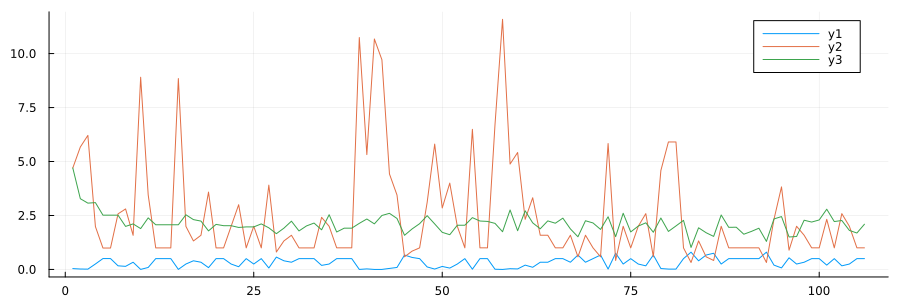

In [13]:
plot(pitch_table.Prob[1:106])
plot!(pitch_table.IC[1:106])
plot!(pitch_table.H[1:106])
plot!(size=(900,300))

# Comparison with IDyOM

In [14]:
idyom_data = CSV.File(idyom_model) |> DataFrame;
idyom_prob = idyom_data[!,"probability"];
idyom_ic = idyom_data[!,"information.content"]
DataFrame(Symbol = pitch_table.Symbol, Idyom = idyom_prob, Julia = pitch_table.Prob)

Row,Symbol,Idyom,Julia
,Int64,Float64,Float64
1,65,0.0384615,0.0384615
2,62,0.0196078,0.0196078
3,60,0.0135135,0.0135135
4,60,0.252632,0.252632
5,60,0.503497,0.503497
6,60,0.503497,0.503497
7,65,0.167832,0.167832
8,65,0.143284,0.143284
9,65,0.334262,0.334262


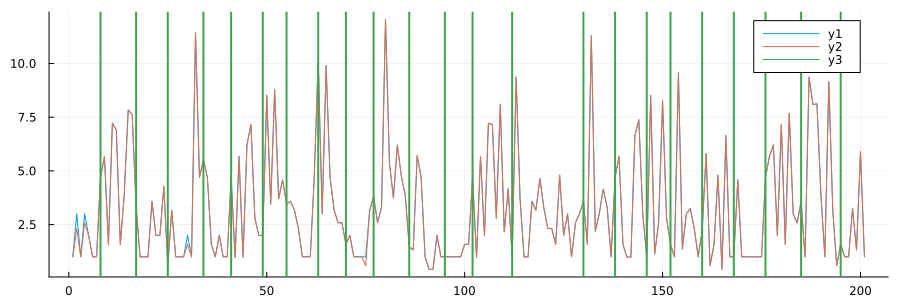

In [15]:
plot(idyom_ic[100:300])
plot!(pitch_table.IC[100:300])
phrases = findall(x->x==1,idyom_data[!,"phrase"][100:300]);
vline!(phrases, lw = 2)
plot!(size=(900,300))

# Multiple Viewpoint Models

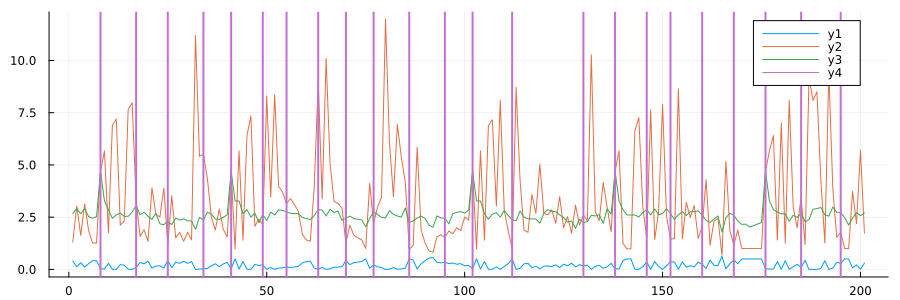

In [20]:
duration_view = [View(seq,vp(Symbol("Melch.DUR")),vp(Symbol("Melch.CPITCH"))) for seq in sequences];
duration_stm = Idyoms.ppm_stm(duration_view,a,b,e,u,o);
pitch_duration_stm = [[Idyoms.combine([p1,p2],0) for (p1,p2) in zip(s,l)] for (s,l) in zip(pitch_stm,duration_stm)];
pitch_duration_table = Idyoms.todataframe(pitch_duration_stm);
plot(pitch_duration_table.Prob[100:300])
plot!(pitch_duration_table.IC[100:300])
plot!(pitch_duration_table.H[100:300])
vline!(phrases, lw = 2)
plot!(size=(900,300))

In [22]:
pdiff = Chakra.diff(vp(Symbol("Melch.CPITCH")))

Chakra.DerivedViewpoint{Int64}(Chakra.LinkedViewpoint{Tuple{Int64, Int64}}(Viewpoint[Chakra.AtomicViewpoint{Int64}(Main.Melch.Attribute{:CPITCH, Int64}(), Type[Int64]), Chakra.DelayedViewpoint{Int64}(Chakra.AtomicViewpoint{Int64}(Main.Melch.Attribute{:CPITCH, Int64}(), Type[Int64]), 1)], DataType[Int64, Int64]), Chakra.var"#48#49"(), #undef)

In [24]:
vp_map(pdiff,sequences[1])

106-element Vector{Option{Int64}}:
   Chakra.None()
 -3
 -2
  0
  0
  0
  5
  0
  0
  4
  0
  0
  0
  ⋮
 -2
 -2
 -3
  0
  0
  0
 -2
 -2
  2
  2
 -4
  0